In [1]:
import sndisplay 
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import time
from scipy.optimize import curve_fit

import sys
sys.path.insert(1, '../')
from functions.other_functions import om_id_string

Welcome to JupyROOT 6.24/02


In [2]:
def get_cell_id(slot, channel):
    if slot == 0:
        if 0 <= channel < 9:
            side = 1
            row = slot * 2 + 1
            layer = channel
        elif 9 <= channel < 18:
            side = 1
            row = slot * 2
            layer = channel - 9
        elif 18<=channel<27:
            side = 0
            row = slot * 2
            layer = channel - 18
        else:
            side = 0
            row = slot * 2 + 1
            layer = channel - 27
    else:
        if 0 <= channel < 9:
            side = 0
            row = slot * 2
            layer = channel
        elif 9 <= channel < 18:
            side = 0
            row = slot * 2 + 1
            layer = channel - 9
        elif 18<=channel<27:
            side = 1
            row = slot * 2 + 1
            layer = channel - 18
        else:
            side = 1
            row = slot * 2 
            layer = channel - 27
    return '{}.{}.{}'.format(side, row, layer)

def cell_id(cellnum):
    cell_side = cellnum // (9*113)
    cell_row = cellnum % (9*113) // 9
    cell_layer = cellnum % (9*113) % 9
    
    return cell_side, cell_row, cell_layer

def linear(x, m, c):
    return m*x + c
    

In [3]:
om_id_string(520 + 16)

'X:0.0.1.0'

In [4]:
file = ROOT.TFile("/Users/williamquinn/Desktop/run_612.root", "READ")
tree = file.T
tree.Print()

******************************************************************************
*Tree    :T         : Tree containing simulated vertex data                  *
*Entries :    19397 : Total =        37047177 bytes  File  Size =   14978589 *
*        :          : Tree compression factor =   2.47                       *
******************************************************************************
*Br    0 :event_num : event_num/I                                            *
*Entries :    19397 : Total  Size=      78308 bytes  File Size  =      27364 *
*Baskets :        3 : Basket Size=      32000 bytes  Compression=   2.84     *
*............................................................................*
*Br    1 :OM_tdcs   : vector<double>                                         *
*Entries :    19397 : Total  Size=     576682 bytes  File Size  =     210735 *
*Baskets :       21 : Basket Size=      32000 bytes  Compression=   2.73     *
*...................................................

In [5]:
events = []

i = 0
# calo_tdcs = [0 for i in range(2034)]
r0ctdc = [[] for i in range(2034)]
r0s = [0 for i in range(2034)]
r1s = [0 for i in range(2034)]
r2s = [0 for i in range(2034)]
r3s = [0 for i in range(2034)]
r4s = [0 for i in range(2034)]
r5s = [0 for i in range(2034)]
r6s = [0 for i in range(2034)]
r01 = [[] for i in range(2034)]
r02 = [[] for i in range(2034)]
r03 = [[] for i in range(2034)]
r04 = [[] for i in range(2034)]
r05 = [[] for i in range(2034)]
r06 = [[] for i in range(2034)]
r056 = [[] for i in range(2034)]
bottom = [[] for i in range(2034)]
top = [[] for i in range(2034)]
first = [[] for i in range(2034)]
second = [[] for i in range(2034)]
t1t3 = [[] for i in range(2034)]
t2t4 = [[] for i in range(2034)]
drift = [[] for i in range(2034)]

n_event = 0
for event in tree:
    skip = False
    
    if len(list(event.OM_IDs)) == 0 or len(list(event.TR_R0)) == 0:
        continue
        
    for om in list(event.OM_IDs):
        if int(om) == 536:
            skip = True
            break
            
    if skip:
        continue
        
    # print(event.OM_tdcs)
    tr_id_a0 = list(event.TR_IDs_anode0)
    r0 = list(event.TR_R0)
    for l in range(len(tr_id_a0)):
        r0s[tr_id_a0[l]] += 1
        
    calo_tdcs = list(event.OM_tdcs)
    if len(calo_tdcs) > 0 and len(tr_id_a0) > 0:
        calo_tdc = calo_tdcs[0]
        for l in range(len(tr_id_a0)):
            r0ctdc[tr_id_a0[l]].append(r0[l]/1000 - calo_tdc/1000)    
        
    tr_id_a1 = list(event.TR_IDs_anode1)
    r1 = list(event.TR_R1)
    for l in range(len(tr_id_a1)):
        r1s[tr_id_a1[l]] += 1
    
    tr_id_a2 = list(event.TR_IDs_anode2)
    r2 = list(event.TR_R2)
    for l in range(len(tr_id_a2)):
        r2s[tr_id_a2[l]] += 1
    
    tr_id_a3 = list(event.TR_IDs_anode3)
    r3 = list(event.TR_R3)
    for l in range(len(tr_id_a3)):
        r3s[tr_id_a3[l]] += 1
    
    tr_id_a4 = list(event.TR_IDs_anode4)
    r4 = list(event.TR_R4)
    for l in range(len(tr_id_a4)):
        r4s[tr_id_a4[l]] += 1
    
    tr_id_c5 = list(event.TR_IDs_cathode5)
    r5 = list(event.TR_R5)
    for l in range(len(tr_id_c5)):
        r5s[tr_id_c5[l]] += 1
    
    tr_id_c6 = list(event.TR_IDs_cathode6)
    r6 = list(event.TR_R6)
    for l in range(len(tr_id_c6)):
        r6s[tr_id_c6[l]] += 1
    
    for j, cell in enumerate(tr_id_a0):
        t1 = None
        t2 = None
        t3 = None
        t4 = None
        t5 = None
        t6 = None
        if cell in tr_id_a1:
            k = tr_id_a1.index(cell)
            t1 = (r1[k] - r0[j])/1000
            r01[cell].append(t1)
        if cell in tr_id_a2:
            k = tr_id_a2.index(cell)
            t2 = (r2[k] - r0[j])/1000
            r02[cell].append(t2)
        if cell in tr_id_a3:
            k = tr_id_a2.index(cell)
            t3 = (r3[k] - r0[j])/1000
            r03[cell].append(t3)
        if cell in tr_id_a4:
            k = tr_id_a4.index(cell)
            t4 = (r4[k] - r0[j])/1000
            r04[cell].append(t4)
        if cell in tr_id_c5:
            k = tr_id_c5.index(cell)
            #print(tr_id_a0, tr_id_c5)
            t5 = (r5[k] - r0[j])/1000
            r05[cell].append(t5)
        if cell in tr_id_c6:
            k = tr_id_c6.index(cell)
            t6 = (r6[k] - r0[j])/1000
            r06[cell].append(t6)
            
        if None in [t5, t6]:
            pass
        else:
            drift[cell].append((calo_tdc, t5+t6))
            
        if None in [t1,t2,t5,t6]:
            pass
        else:
            if t5>t6:
                bottom[cell].append((t5, t1))
                top[cell].append((t6, t2))
            else:
                bottom[cell].append((t5, t2))
                top[cell].append((t6, t1))
                
        if None in [t1,t2,t5,t6]:
            pass
        else:
            if t5>t6:
                first[cell].append((t1, t6))
                second[cell].append((t2, t5))
            else:
                first[cell].append((t1, t5))
                second[cell].append((t2, t6))
                
        if None in [t1, t2, t3, t4]:
            pass
        else:
            t1t3[cell].append(t3-t1)
            t2t4[cell].append(t4-t2)
            
            
        if cell in tr_id_c5 and cell in tr_id_c6:
            k = tr_id_c5.index(cell)
            k_ =tr_id_c6.index(cell)
            r056[cell].append(((r5[k] - r0[j])/1000, (r6[k_] - r0[j])/1000))
    
    i += 1
    if i % 1000 == 0:
        print(i, time.asctime())
    n_event += 1
print(n_event)

t0 = r0ctdc
t1 = r01
t2 = r02
t3 = r03
t4 = r04
t5 = r05
t6 = r06
t5t6 = r056
    

1000 Wed Oct 27 15:17:57 2021
2000 Wed Oct 27 15:17:58 2021
3000 Wed Oct 27 15:17:59 2021
4000 Wed Oct 27 15:17:59 2021
5000 Wed Oct 27 15:18:00 2021
6000 Wed Oct 27 15:18:00 2021
7000 Wed Oct 27 15:18:01 2021
8000 Wed Oct 27 15:18:02 2021
9000 Wed Oct 27 15:18:02 2021
10000 Wed Oct 27 15:18:03 2021
11000 Wed Oct 27 15:18:04 2021
11008


In [6]:
run = str(612)

In [7]:
sn_tracker = sndisplay.tracker('tr_anode_' + run)
sn_tracker.draw_cellnum_label()
sn_tracker.draw_content_label('{}')

for i in range(len(r0s)):
    if r0s[i] > 0:
        sn_tracker.setcontent(i, r0s[i])
        
sn_tracker.draw()
sn_tracker.save("/Users/williamquinn/Desktop/")

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop//tr_anode_612_tr.pdf has been created


In [8]:
sn_tracker = sndisplay.tracker('tr_bottom_cathode_' + run)
sn_tracker.draw_cellid_label()
sn_tracker.draw_content_label('{}')

for i in range(len(r5s)):
    if r5s[i] > 0:
        sn_tracker.setcontent(i, r5s[i])
        
sn_tracker.draw()
sn_tracker.save("/Users/williamquinn/Desktop/")

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop//tr_bottom_cathode_612_tr.pdf has been created


In [9]:
sn_tracker = sndisplay.tracker('tr_top_cathode_' + run)
sn_tracker.draw_cellid_label()
sn_tracker.draw_content_label('{}')

for i in range(len(r6s)):
    if r6s[i] > 0:
        sn_tracker.setcontent(i, r6s[i])
        
sn_tracker.draw()
sn_tracker.save("/Users/williamquinn/Desktop/")

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop//tr_top_cathode_612_tr.pdf has been created


In [10]:
cell = 6
width = 12.5

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop/all_cell_r6_vs_r5.pdf has been created


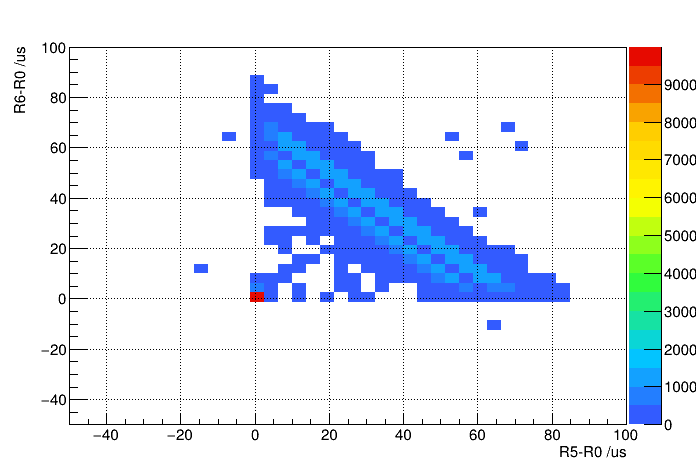

In [11]:
lower = -50
higher = 100
ROOT.gStyle.SetOptStat(0)
hist = ROOT.TH2F("","",40, lower, higher,
                40, lower, higher)
can = ROOT.TCanvas()
x = []
y = []
for i in range(2034):
    for j in range(len(r056[i])):
        hist.Fill(r056[i][j][0], r056[i][j][1])
can.cd()
hist.Draw("colz")
hist.GetXaxis().SetTitle("R5-R0 /us")
hist.GetYaxis().SetTitle("R6-R0 /us")
can.SetGrid()
can.Draw()
can.SaveAs("/Users/williamquinn/Desktop/all_cell_r6_vs_r5.pdf")

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop/all_cell_zoom_r6_vs_r5.pdf has been created


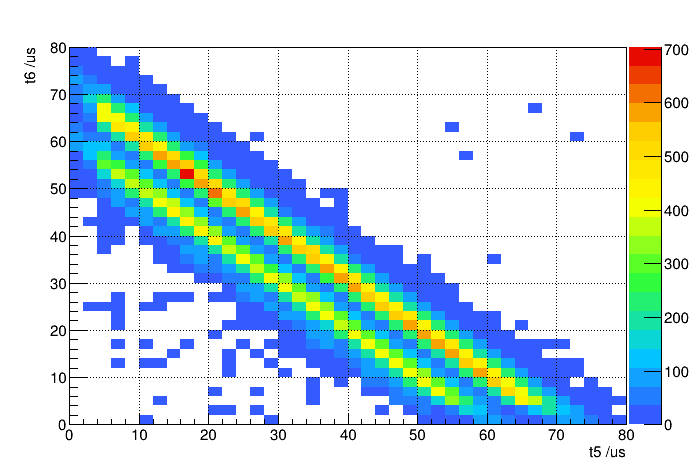

In [12]:
lower = 0
higher = 80
ROOT.gStyle.SetOptStat(0)
hist = ROOT.TH2F("","",40, lower, higher,
                40, lower, higher)
can = ROOT.TCanvas()
x = []
y = []
for i in range(2034):
    for j in range(len(r056[i])):
        if r056[i][j][0] < 10 and r056[i][j][1] < 10:
            continue
        hist.Fill(r056[i][j][0], r056[i][j][1])
can.cd()
hist.Draw("colz")
hist.GetXaxis().SetTitle("t5 /us")
hist.GetYaxis().SetTitle("t6 /us")
can.SetGrid()
can.Draw()
can.SaveAs("/Users/williamquinn/Desktop/all_cell_zoom_r6_vs_r5.pdf".format(cell))

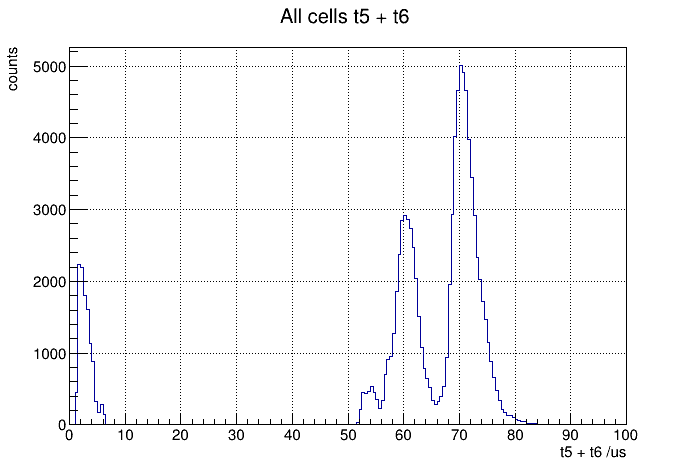

In [13]:
can = ROOT.TCanvas()
hist = ROOT.TH1D("","",200, 0,100)
f = []
for cell in range(len(t5t6)):
    for i in range(len(t5t6[cell])):
        hist.Fill(t5t6[cell][i][0] + t5t6[cell][i][1])
        f.append(t5t6[cell][i][0] + t5t6[cell][i][1])

can.cd()
hist.Draw("HIST")
hist.GetXaxis().SetTitle("t5 + t6 /us")
hist.GetYaxis().SetTitle("counts")
hist.SetTitle("All cells t5 + t6")
# can.SetLogy()
can.SetGrid()
can.Draw()

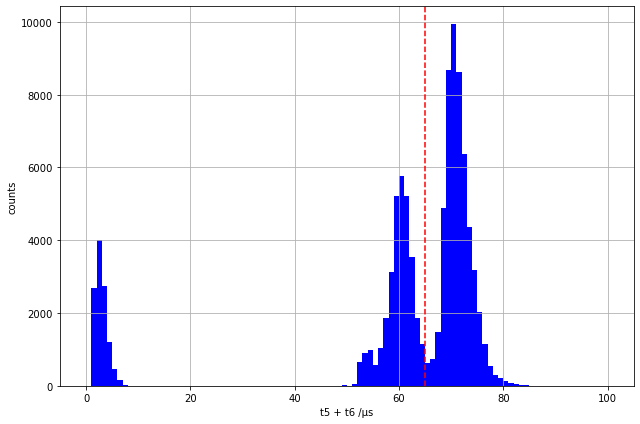

In [14]:
fig = plt.figure(figsize=(9,6), facecolor='white')
freq, bin_edges = np.histogram(f, 100, range=(0,100))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.bar(bin_centres, freq, color="blue", width=width, label='')
plt.xlabel('t5 + t6 /µs')
plt.ylabel('counts')
plt.grid()
plt.axvline(65, ls='--', color='red')
plt.tight_layout()
plt.savefig("/Users/williamquinn/Desktop/t5t6_all_cell.pdf")

ValueError: `ydata` must not be empty!

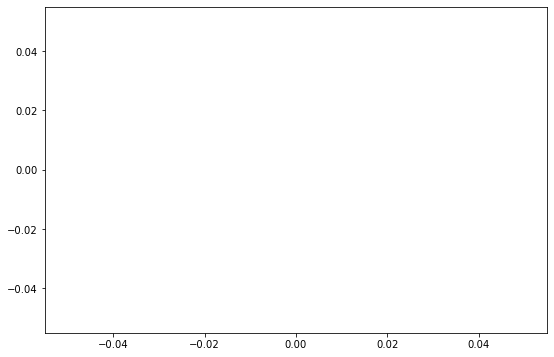

In [15]:
cell = 8
fig = plt.figure(figsize=(9,6), facecolor='white')
x_ = np.array([x[0] for x in drift[cell]])/1e9
y_ = np.array([x[1] for x in drift[cell]])
plt.plot(x_, y_, ".")
popt, pcov = curve_fit(f=linear, xdata=x_, ydata=y_)
plt.plot(x_, linear(x_, *popt))
plt.title('Cell: {}, m={:.3e}'.format(cell, popt[0]))
plt.grid()
plt.xlabel('calo time /s')
plt.ylabel('drift time t5+t6 /µs')

In [16]:
sn_tracker = sndisplay.tracker("drift")
sn_tracker.draw_cellid_label()
sn_tracker.draw_content_label('{:.0e}')
grad = []

for cell in range(2034):
    if len(drift[cell]) < 2:
        continue
    x_ = np.array([x[0] for x in drift[cell]])/1e9
    y_ = np.array([x[1] for x in drift[cell]])
    popt, pcov = curve_fit(f=linear, xdata=x_, ydata=y_)
    grad.append(popt[0])
    
    sn_tracker.setcontent(cell, popt[0])
    
sn_tracker.draw()
sn_tracker.save("/Users/williamquinn/Desktop/")

/Users/williamquinn/opt/anaconda3/envs/my_root_env/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop//drift_tr.pdf has been created


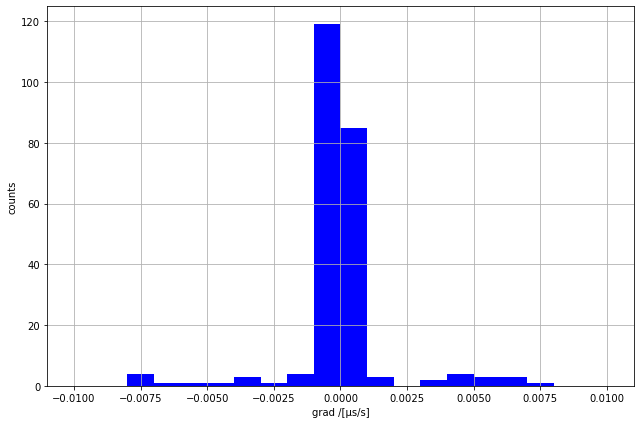

In [17]:
fig = plt.figure(figsize=(9,6), facecolor='white')
freq, bin_edges = np.histogram(grad, 20, range=(-0.01,0.01))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.bar(bin_centres, freq, color="blue", width=width, label='')
plt.xlabel('grad /[µs/s]')
plt.ylabel('counts')
plt.grid()
plt.tight_layout()
plt.savefig("/Users/williamquinn/Desktop/grad_drift.pdf")

In [18]:
sn_tracker = sndisplay.tracker("t5t6_av")
sn_tracker.draw_cellnum_label()
sn_tracker.draw_content_label('{:.2f}')

for cell in range(2034):
    temp_t5 = np.array([x[0] for x in t5t6[cell]])
    temp_t6 = np.array([x[1] for x in t5t6[cell]])
    if temp_t5.size == 0:
        continue
    val = temp_t5 + temp_t6
    average = np.average(val)
    sn_tracker.setcontent(cell, average)
    
sn_tracker.draw()
sn_tracker.save("/Users/williamquinn/Desktop/")

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop//t5t6_av_tr.pdf has been created


In [19]:
sn_tracker = sndisplay.tracker("t5t6_std")
sn_tracker.draw_cellnum_label()
sn_tracker.draw_content_label('{:.2f}')

for cell in range(2034):
    temp_t5 = np.array([x[0] for x in t5t6[cell]])
    temp_t6 = np.array([x[1] for x in t5t6[cell]])
    if temp_t5.size == 0:
        continue
    val = temp_t5 + temp_t6
    # average = np.average(val)
    std = np.std(val)
    sn_tracker.setcontent(cell, std)
    
sn_tracker.draw()
sn_tracker.save("/Users/williamquinn/Desktop/")

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop//t5t6_std_tr.pdf has been created


244


<BarContainer object of 20 artists>

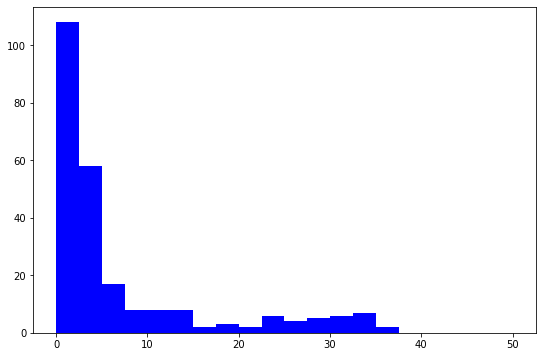

In [20]:
stds = []
for cell in range(2034):
    temp_t5 = np.array([x[0] for x in t5t6[cell]])
    temp_t6 = np.array([x[1] for x in t5t6[cell]])
    if temp_t5.size == 0:
        continue
    val = temp_t5 + temp_t6
    # average = np.average(val)
    std = np.std(val)
    
    stds.append(std)
print(len(stds))
fig = plt.figure(figsize=(9,6), facecolor='white')
freq, bin_edges = np.histogram(stds, 20, range=(0,50))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.bar(bin_centres, freq, width=width, color="blue", label='t6')

In [21]:
sn_tracker = sndisplay.tracker("t5t6_comp")
sn_tracker.draw_cellnum_label()
sn_tracker.draw_content_label('{:.2f}')

for cell in range(2034):
    temp_t5 = np.array([x[0] for x in t5t6[cell]])
    temp_t6 = np.array([x[1] for x in t5t6[cell]])
    if temp_t5.size == 0:
        continue
    val = temp_t5 + temp_t6
    average = np.average(val)
    if average < 65:
        sn_tracker.setcontent(cell, 0)
    else:
        sn_tracker.setcontent(cell, 1)
    
sn_tracker.draw()
sn_tracker.save("/Users/williamquinn/Desktop/")

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop//t5t6_comp_tr.pdf has been created


hi
hi


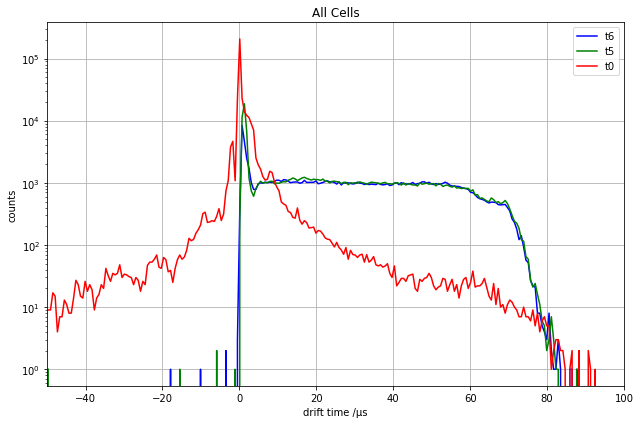

In [22]:
lower = -50
higher = 100
c = []
d = []
e = []
for cellnum in range(len(r05)):
    cell_side = cellnum // (9*113)
    cell_row = cellnum % (9*113) // 9
    cell_layer = cellnum % (9*113) % 9
    c += t6[cellnum]
    d += t5[cellnum]
    e += t0[cellnum]
fig = plt.figure(figsize=(9,6), facecolor='white')
freq, bin_edges = np.histogram(c, 250, range=(lower,higher))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "b-", label='t6')

freq, bin_edges = np.histogram(d, 250, range=(lower,higher))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "g-", label='t5')

freq, bin_edges = np.histogram(e, 250, range=(lower,higher))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "r-", label='t0')

plt.grid()
plt.xlabel("drift time /µs")
plt.ylabel("counts")
plt.xlim(lower, higher)
plt.title("All Cells")
plt.yscale('log')
plt.legend(loc='best')
plt.tight_layout()
print('hi')
plt.savefig("/Users/williamquinn/Desktop/all_r5.pdf")
print('hi')

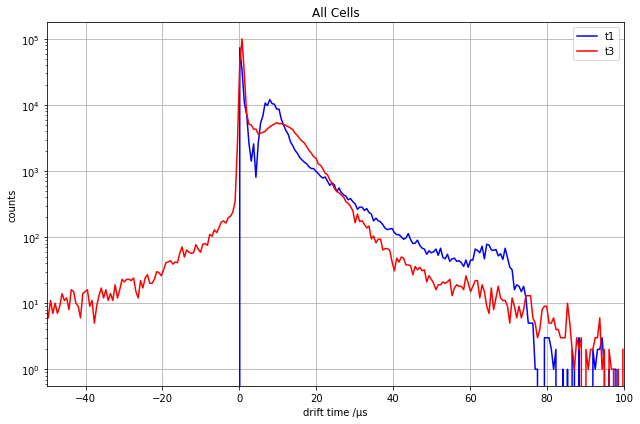

In [23]:
lower = -50
higher = 100
c = []
d = []
for cellnum in range(len(r05)):
    cell_side = cellnum // (9*113)
    cell_row = cellnum % (9*113) // 9
    cell_layer = cellnum % (9*113) % 9
    c += t1[cellnum]
    d += t3[cellnum]
fig = plt.figure(figsize=(9,6), facecolor='white')
freq, bin_edges = np.histogram(c, 250, range=(lower,higher))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "b-", label='t1')

freq, bin_edges = np.histogram(d, 250, range=(lower,higher))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "r-", label='t3')

plt.grid()
plt.xlabel("drift time /µs")
plt.ylabel("counts")
plt.xlim(lower, higher)
plt.title("All Cells")
plt.yscale('log')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("/Users/williamquinn/Desktop/all_r13.pdf")

(-50.0, 100.0)

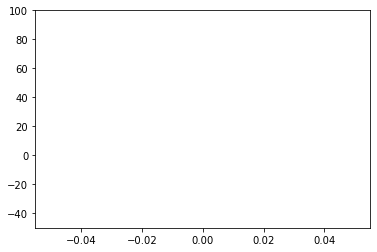

In [24]:
# plt.plot(t1[0], '.')
# plt.plot(t2[0], '.')
plt.plot(t3[0], '.')
# plt.plot(t4[0], '.')
# plt.yscale('log')
plt.ylim(-50,100)

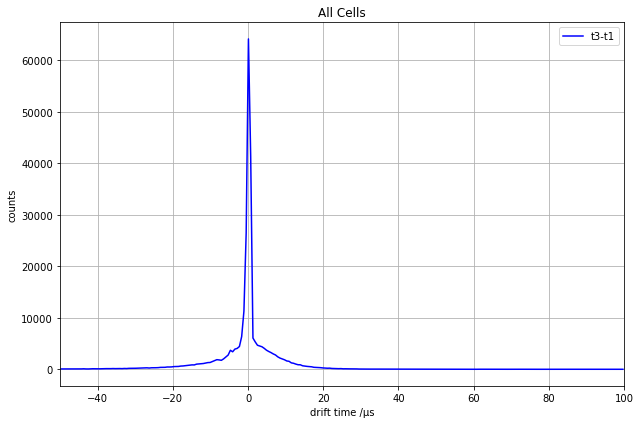

In [25]:
lower = -50
higher = 100
c = []
for cellnum in range(len(r05)):
    cell_side = cellnum // (9*113)
    cell_row = cellnum % (9*113) // 9
    cell_layer = cellnum % (9*113) % 9
    c += t1t3[cellnum]
    
fig = plt.figure(figsize=(9,6), facecolor='white')
freq, bin_edges = np.histogram(c, 250, range=(lower,higher))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "b-", label='t3-t1')

plt.grid()
plt.xlabel("drift time /µs")
plt.ylabel("counts")
plt.xlim(lower, higher)
plt.title("All Cells")
# plt.yscale('log')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("/Users/williamquinn/Desktop/all_t1t3.pdf")

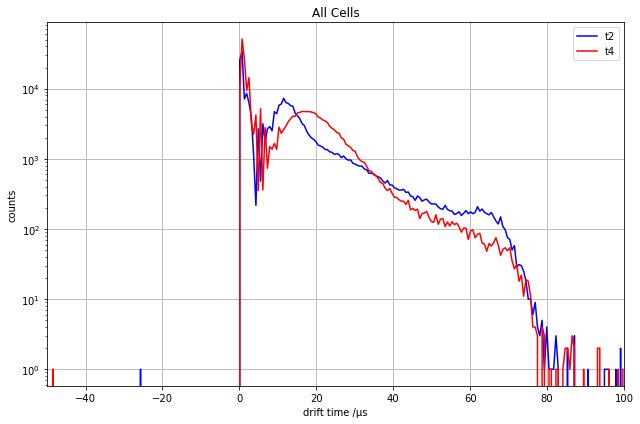

In [26]:
lower = -50
higher = 100
c = []
d = []
e = []
for cellnum in range(len(r05)):
    cell_side = cellnum // (9*113)
    cell_row = cellnum % (9*113) // 9
    cell_layer = cellnum % (9*113) % 9
    c += r02[cellnum]
    d += r04[cellnum]
    for i in range(len(r04[cellnum])):
        # print(r02[cellnum][i]/r04[cellnum][i])
        e.append(r02[cellnum][i] - r04[cellnum][i])
fig = plt.figure(figsize=(9,6), facecolor='white')
freq, bin_edges = np.histogram(c, 250, range=(lower,higher))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "b-", label='t2')

freq, bin_edges = np.histogram(d, 250, range=(lower,higher))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "r-", label='t4')

plt.grid()
plt.xlabel("drift time /µs")
plt.ylabel("counts")
plt.xlim(lower, higher)
plt.title("All Cells")
plt.yscale('log')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("/Users/williamquinn/Desktop/all_r24.pdf")

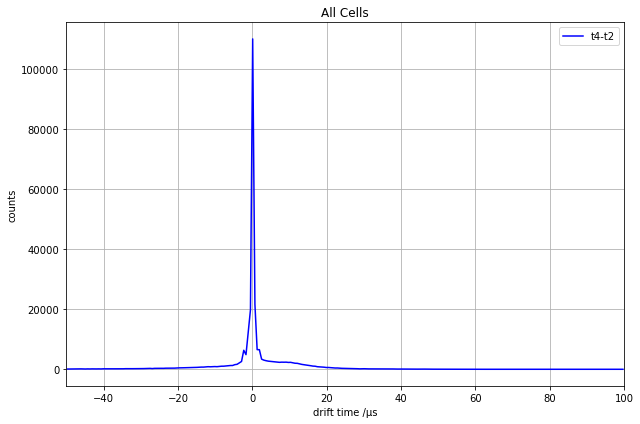

In [27]:
lower = -50
higher = 100
c = []
for cellnum in range(len(r05)):
    cell_side = cellnum // (9*113)
    cell_row = cellnum % (9*113) // 9
    cell_layer = cellnum % (9*113) % 9
    c += t2t4[cellnum]
fig = plt.figure(figsize=(9,6), facecolor='white')
freq, bin_edges = np.histogram(c, 250, range=(lower,higher))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "b-", label='t4-t2')

plt.grid()
plt.xlabel("drift time /µs")
plt.ylabel("counts")
plt.xlim(lower, higher)
plt.title("All Cells")
# plt.yscale('log')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("/Users/williamquinn/Desktop/all_t2t4.pdf")

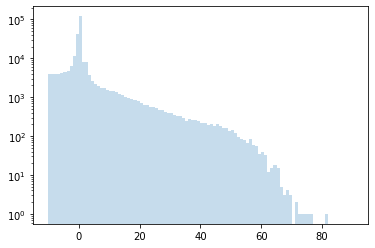

In [28]:
freq, bin_edges = np.histogram(e, 100, range=(-10,90))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.bar(bin_centres, freq, width=width, alpha = 0.25)
plt.yscale('log')

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop/all_cell_bottom.pdf has been created


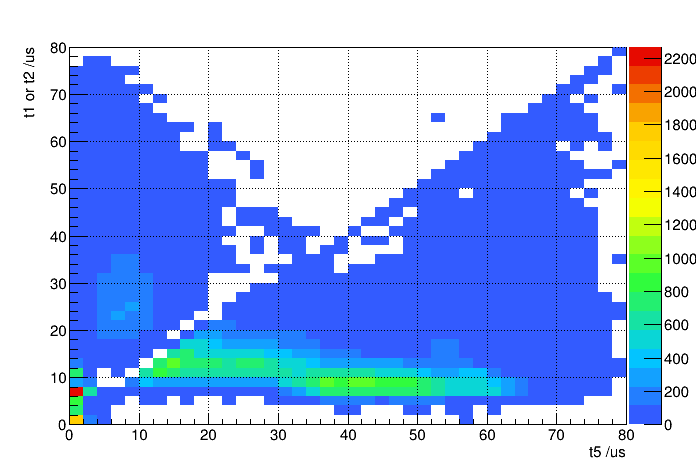

In [29]:
lower = 0
higher = 80
ROOT.gStyle.SetOptStat(0)
hist = ROOT.TH2F("","",40, lower, higher,
                40, lower, higher)

for cellnum in range(2034):
    cell_side = cellnum // (9*113)
    cell_row = cellnum % (9*113) // 9
    cell_layer = cellnum % (9*113) % 9
    
    for i in range(len(bottom[cellnum])):
        hist.Fill(bottom[cellnum][i][0], bottom[cellnum][i][1])
    
can = ROOT.TCanvas()      
can.cd()
hist.Draw("colz")
hist.GetXaxis().SetTitle("t5 /us")
hist.GetYaxis().SetTitle("t1 or t2 /us")
can.SetGrid()
can.Draw()
can.SaveAs("/Users/williamquinn/Desktop/all_cell_bottom.pdf".format(cell))

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop/all_cell_top.pdf has been created


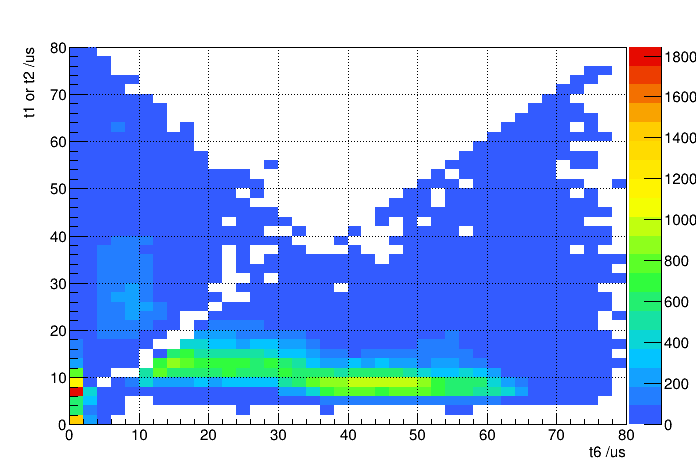

In [30]:
lower = 0
higher = 80
ROOT.gStyle.SetOptStat(0)
hist = ROOT.TH2F("","",40, lower, higher,
                40, lower, higher)

for cellnum in range(2034):
    cell_side = cellnum // (9*113)
    cell_row = cellnum % (9*113) // 9
    cell_layer = cellnum % (9*113) % 9
    
    for i in range(len(top[cellnum])):
        hist.Fill(top[cellnum][i][0], top[cellnum][i][1])
    
can = ROOT.TCanvas()      
can.cd()
hist.Draw("colz")
hist.GetXaxis().SetTitle("t6 /us")
hist.GetYaxis().SetTitle("t1 or t2 /us")
can.SetGrid()
can.Draw()
can.SaveAs("/Users/williamquinn/Desktop/all_cell_top.pdf".format(cell))